In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

#https://docs.google.com/document/d/1yTwepxl8KDmv0QSTVorNWXrqaaW0Ryy8Dm7khLU93Ug/edit
#muy bueno para ver!!!!!

In [2]:
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [3]:
df = pd.read_csv('datos.csv')

In [4]:
print('Las columnas son estas: ', df.columns.tolist())

Las columnas son estas:  ['SEMILLA', 'PRECIO', 'ZONA']


In [5]:
df.head()

,SEMILLA,PRECIO,ZONA
0,Trigo,6011,ZONA 9
1,Soja,6130,ZONA 9
2,Soja,2412,ZONA 9
3,Soja,5643,ZONA 9
4,Soja,6893,ZONA 9


In [6]:
df.dtypes

SEMILLA    object
PRECIO      int64
ZONA       object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SEMILLA  9999 non-null   object
 1   PRECIO   9999 non-null   int64 
 2   ZONA     9999 non-null   object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [8]:
df.isna().sum()

SEMILLA    0
PRECIO     0
ZONA       0
dtype: int64

In [9]:
df.shape

(9999, 3)

In [10]:
df.describe()

,PRECIO
count,9999.000000
mean,3257.702470
std,1397.875608
min,-367.000000
25%,2412.000000
50%,2940.000000
75%,3799.500000
max,20763.000000


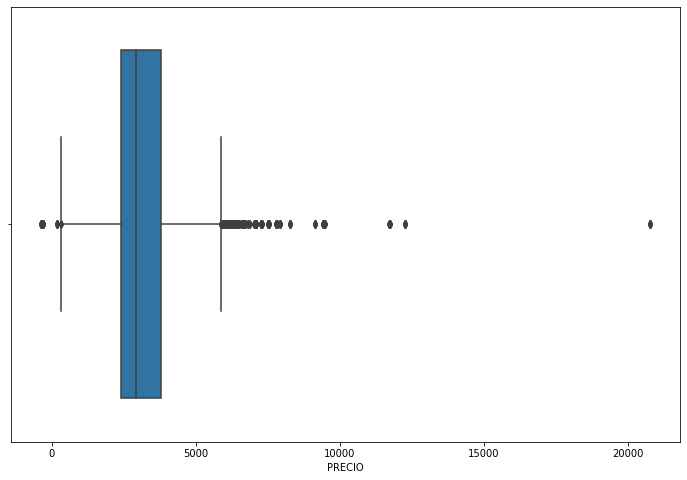

In [11]:
sns.boxplot(df.PRECIO)

<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" />

In [12]:
q25, q75 = np.percentile(df.PRECIO, [25 ,75])
iqr = q75 - q25

q25, q75, iqr

(2412.0, 3799.5, 1387.5)

In [13]:
Q1 = df.PRECIO.quantile(0.25)
Q3 = df.PRECIO.quantile(0.75)
IQR =  Q3 - Q1

Q1, Q3, IQR

(2412.0, 3799.5, 1387.5)

In [14]:
IQMenor = Q1 - (1.5 * IQR)
IQMayor = Q3 + (1.5 * IQR)

IQMenor, IQMayor

(330.75, 5880.75)

In [15]:
df.shape

(9999, 3)

In [16]:
df_mejor_distribucion = df[df.PRECIO > IQMenor]

In [17]:
df_mejor_distribucion = df_mejor_distribucion[df_mejor_distribucion.PRECIO < IQMayor]

In [18]:
df_mejor_distribucion.shape

(9525, 3)

In [19]:
valores_eliminados = df.shape[0] - df_mejor_distribucion.shape[0]

In [20]:
valores_eliminados

474

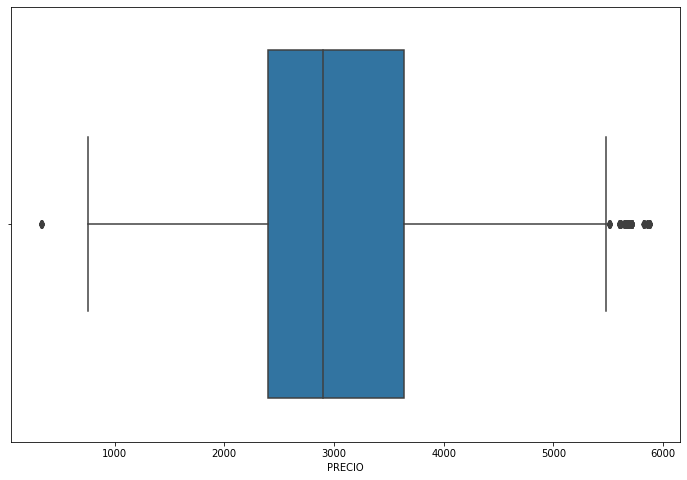

In [21]:
sns.boxplot(df_mejor_distribucion.PRECIO)

In [22]:
df_mejor_distribucion.head()

,SEMILLA,PRECIO,ZONA
2,Soja,2412,ZONA 9
3,Soja,5643,ZONA 9
5,Soja,3601,ZONA 9
6,Soja,3447,ZONA 9
8,Soja,1893,ZONA 9


In [23]:
df_mejor_distribucion.SEMILLA.unique()

array(['Soja', 'Maiz', 'Trigo', 'Sorgo'], dtype=object)

In [24]:
df_mejor_distribucion.ZONA.unique()

array(['ZONA 9', 'ZONA 3', 'ZONA 18', 'ZONA 11', 'ZONA 2', 'ZONA 15',
       'ZONA 17', 'ZONA 6', 'ZONA 14', 'ZONA 1', 'ZONA 19', 'ZONA 8',
       'ZONA 7', 'ZONA 12', 'ZONA 13', 'ZONA 4', 'ZONA 16', 'ZONA 10',
       'ZONA 5'], dtype=object)

In [25]:
df_mejor_distribucion.describe()

,PRECIO
count,9525.000000
mean,3085.300052
std,973.097396
min,331.000000
25%,2396.000000
50%,2903.000000
75%,3639.000000
max,5880.000000


In [26]:
df_mejor_distribucion['RANGO_PRECIOS'] = pd.cut(df_mejor_distribucion.PRECIO, 
                                                bins=[0,1000,2000,3000, 4000, 5000, 6000], 
                                                labels=['1', '2', '3', '4', '5', '6'])

In [27]:
df_mejor_distribucion.head()

,SEMILLA,PRECIO,ZONA,RANGO_PRECIOS
2,Soja,2412,ZONA 9,3
3,Soja,5643,ZONA 9,6
5,Soja,3601,ZONA 9,4
6,Soja,3447,ZONA 9,4
8,Soja,1893,ZONA 9,2


In [28]:
df_mejor_distribucion.tail()

,SEMILLA,PRECIO,ZONA,RANGO_PRECIOS
9993,Maiz,2559,ZONA 5,3
9994,Maiz,4406,ZONA 5,5
9996,Maiz,2302,ZONA 5,3
9997,Sorgo,2610,ZONA 5,3
9998,Soja,3079,ZONA 5,4


In [29]:
df_Soja = df_mejor_distribucion[df_mejor_distribucion.SEMILLA == 'Soja']

In [30]:
df_Soja.head()

,SEMILLA,PRECIO,ZONA,RANGO_PRECIOS
2,Soja,2412,ZONA 9,3
3,Soja,5643,ZONA 9,6
5,Soja,3601,ZONA 9,4
6,Soja,3447,ZONA 9,4
8,Soja,1893,ZONA 9,2


In [31]:
df_Soja.SEMILLA.unique()

array(['Soja'], dtype=object)

In [32]:
df_Soja['RANGO_PRECIOS'].groupby(df_Soja['RANGO_PRECIOS']) \
                                          .count() \
                                          .reset_index(name='TOTAL') \
                                          .sort_values(['RANGO_PRECIOS'], ascending=True)

,RANGO_PRECIOS,TOTAL
0,1,0
1,2,45
2,3,218
3,4,152
4,5,65
5,6,30


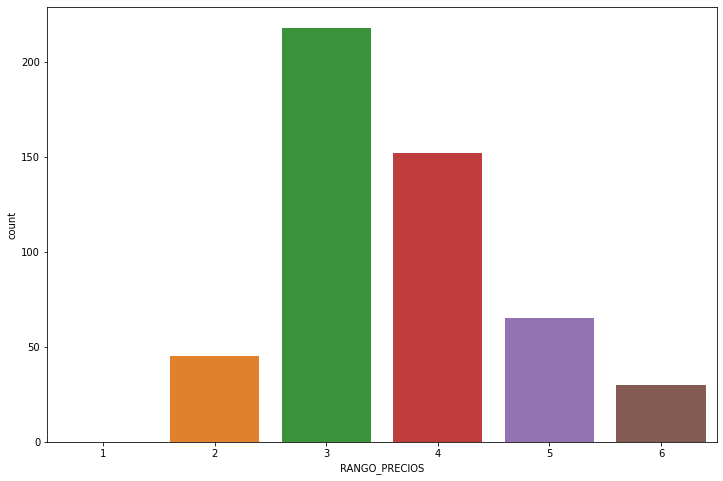

In [33]:
sns.countplot(x= "RANGO_PRECIOS", data= df_Soja)

In [ ]:
#df = mejor
columnas = df.columns.tolist()
lista_numerica = []
lista_categorica = []
for x in range(0,len(df.columns))  :
    if df[columnas[x]].dtype == 'int64'or df[columnas[x]].dtype == 'float64':
        lista_numerica.append(columnas[x])
    else:
        lista_categorica.append(columnas[x])

In [ ]:
ig = plt.figure(figsize=(15,8))
i=0
for columns in lista_numerica:
    i=i+1
    Q1 = mejor[columns].quantile(0.25)
    Q3 = mejor[columns].quantile(0.75)
    iqr = Q3 - Q1
    if Q1 - (1.5 * iqr)<0:
        IQMenor = 0.0
    else:
        IQMenor=Q1 - (1.5 * iqr)
    IQMayor = Q3 + (1.5 * iqr)
    limpio=mejor[(mejor[columns]>IQMenor) & (mejor[columns]<IQMayor)]
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(limpio[columns])

In [ ]:
#John Ortiz Ordoñez
#codigofacilito 
#corr = grafico[grafico.l3=='Recoleta'].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},   #annot_kws(tamaño de adentro)
           cmap= 'coolwarm')
plt.xticks(rotation = 30)
plt.show()
#plt.figure(figsize=(15,8))
ax=sns.barplot(y='price',x=zonas.index,data=zonas)
for p in ax.patches:
    ax.annotate('{:.0f} USD'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


In [ ]:
#github VER ESTA PAGINA Y CREAR UNA CUENTA PARA PRACTICAR